In [12]:
import pandas as pd

In [13]:
# 1. Descargar el conjunto de datos
url = "./pop_failures.dat"

df = pd.read_csv(url, delimiter=r"\s+")  # El archivo tiene 21 líneas de metadatos al principio

# 2. Cargarlo en un Pandas DataFrame
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [14]:
# Conteo de clases
classes = df['outcome'].value_counts()

print(classes / classes.sum())

outcome
1    0.914815
0    0.085185
Name: count, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
import random, time 
X = df.drop('outcome', axis=1)
y = df['outcome']

seed=random.seed(time.time())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("Accuracy Regresión Logística:", accuracy_score(y_test, y_pred_log))

# k-Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy kNN:", accuracy_score(y_test, y_pred_knn))


Accuracy Regresión Logística: 0.9629629629629629
Accuracy kNN: 0.9166666666666666


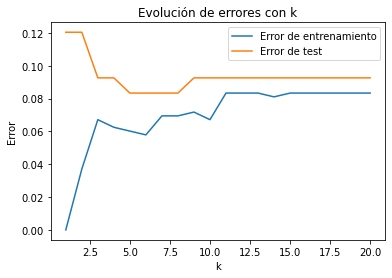

In [18]:
import matplotlib.pyplot as plt

k_vals = range(1, 21)
train_errors = []
test_errors = []

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

plt.plot(k_vals, train_errors, label='Error de entrenamiento')
plt.plot(k_vals, test_errors, label='Error de test')
plt.xlabel('k')
plt.ylabel('Error')
plt.legend()
plt.title('Evolución de errores con k')
plt.show()
